In [59]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [60]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [61]:
import pandas as pd 
import numpy as np

In [64]:
import os
import math
from ast import literal_eval
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

from SSMuLA.fitness_process_vis import parse_lib_stat
from SSMuLA.de_simulations import DE_COLORS, DE_TYPES, DE_LEGEND_MAP
from SSMuLA.vis import FZL_PALETTE, LIB_COLORS

from SSMuLA.mlde_analysis import avg_alde_df, get_mlde_avg_df, get_mlde_avg_sdf, TOTAL_N_LIST
from SSMuLA.zs_analysis import (
    ZS_OPTS,
    ZS_COMB_OPTS,
    ZS_OPTS_LEGEND,
)
from SSMuLA.landscape_global import LIB_INFO_DICT, N_SAMPLE_LIST

%matplotlib inline

In [66]:
lib_stat = parse_lib_stat(
    lib_csv_path="results/fitness_distribution/max/all_lib_stats.csv", n_mut_cuttoff=0
)
active_cutoff = 1
active_lib_list = lib_stat[(lib_stat["percent_active"]>=active_cutoff)]["lib"].tolist() # & (lib_stat["percent_measured"]>90)
active_lib_list

['DHFR',
 'ParD2',
 'ParD3',
 'GB1',
 'T7',
 'TEV',
 'TrpB3D',
 'TrpB3E',
 'TrpB3F',
 'TrpB3G',
 'TrpB3I',
 'TrpB4']

In [5]:
old_mlde_all = pd.read_csv("results/mlde/vis_5/all_df.csv")
old_mlde_all.encoding.unique()

array(['one-hot', 'esm2_t33_650M_UR50D-flatten_site',
       'esm2_t33_650M_UR50D-mean_all', 'esm2_t33_650M_UR50D-mean_site'],
      dtype=object)

In [6]:
old_mlde_all.ft_lib.unique()

array([  4000,   2000,   1000,  80000,  40000,  20000,   1141,   2168,
         1134,   1127,   1137,   1140,   1126,   1075,   1136,   1138,
         1121,   2243,     58,     77,     57,   8000, 149361,   7882,
         7971,   7996,   7994,   7763,   7964,   7339,   7891,   7716,
         7784, 159129])

In [7]:
# test if emb > oh
mlde_all = pd.read_csv("results/mlde/all_df_comb_onehot_4.csv")

In [93]:
emd_mlde = pd.read_csv("results/mlde_emb/vis/all_df.csv")

In [94]:
mlde = pd.concat(
    [
        mlde_all[
            (mlde_all["n_mut_cutoff"] == "all")
            & (mlde_all["zs"] == "none")
            & (mlde_all["n_top"] == 96)
            & (mlde_all["rep"].isin(np.arange(50)))
            & (mlde_all["model"] == "boosting")
        ],
        old_mlde_all[
            (old_mlde_all["n_mut_cutoff"] == "all")
            & (old_mlde_all["zs"] == "none")
            & (old_mlde_all["n_top"] == 96)
            & (old_mlde_all["encoding"] != "one-hot")
            & (old_mlde_all["rep"].isin(np.arange(50)))
            & (old_mlde_all["model"] == "boosting")
        ],
        emd_mlde[
            (emd_mlde["zs"] == "none")
            & (emd_mlde["n_top"] == 96)
            & (emd_mlde["n_mut_cutoff"] == "all")
            & (emd_mlde["rep"].isin(np.arange(50)))
            & (emd_mlde["model"] == "boosting")
        ],
    ]
).drop_duplicates()
mlde

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
845800,one-hot,boosting,24,8000,0,0.267066,0.139139,0.865538,0.515047,0.904171,0.318921,0.0,432.0,all,DHFR,none,96,max
845801,one-hot,boosting,24,8000,1,0.180532,0.130917,0.996537,0.400253,0.807204,0.256821,0.0,191.0,all,DHFR,none,96,max
845802,one-hot,boosting,24,8000,2,0.258320,0.134396,0.960769,0.300621,0.775122,0.178083,0.0,361.0,all,DHFR,none,96,max
845803,one-hot,boosting,24,8000,3,0.740868,0.158299,0.847249,0.564689,0.887130,0.284650,0.0,1039.0,all,DHFR,none,96,max
845804,one-hot,boosting,24,8000,4,0.186233,0.130543,0.741961,0.282581,0.774673,0.218281,0.0,360.0,all,DHFR,none,96,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541995,esm2_t33_650M_UR50D-mean_site,boosting,1920,159129,45,0.797592,0.022140,0.832570,0.310423,0.982345,0.274632,0.0,1093.0,all,TrpB4,none,96,max
541996,esm2_t33_650M_UR50D-mean_site,boosting,1920,159129,46,0.589781,0.019353,0.752895,0.367258,0.982889,0.263212,0.0,3190.0,all,TrpB4,none,96,max
541997,esm2_t33_650M_UR50D-mean_site,boosting,1920,159129,47,0.922082,0.021752,0.922559,0.323605,0.984626,0.263196,0.0,2100.0,all,TrpB4,none,96,max
541998,esm2_t33_650M_UR50D-mean_site,boosting,1920,159129,48,0.845507,0.023298,0.922559,0.303932,0.982470,0.267447,0.0,1588.0,all,TrpB4,none,96,max


In [41]:
mlde.ft_lib.unique()

array([  8000, 149361,   7882,   7971,   7996,   7994,   7763,   7964,
         7339,   7891,   7716,   7784, 159129,   6725, 159132])

In [29]:
0.125*20**3, 0.125*20**4

(1000.0, 20000.0)

In [95]:
mlde_ev = pd.concat(
    [
        mlde_all[
            (mlde_all["n_mut_cutoff"] == "all")
            & (mlde_all["zs"] == "ev_score")
            & (mlde_all["n_top"] == 96)
            & (mlde_all["rep"].isin(np.arange(50)))
            & (mlde_all["model"] == "boosting")
            & (mlde_all["ft_lib"].isin([1000, 20000]))
        ],
        old_mlde_all[
            (old_mlde_all["n_mut_cutoff"] == "all")
            & (old_mlde_all["zs"] == "ev_score")
            & (old_mlde_all["n_top"] == 96)
            & (old_mlde_all["encoding"] != "one-hot")
            & (old_mlde_all["rep"].isin(np.arange(50)))
            & (old_mlde_all["model"] == "boosting")
            & (old_mlde_all["ft_lib"].isin([1000, 20000]))
        ],
        emd_mlde[
            (emd_mlde["zs"] == "ev_score")
            & (emd_mlde["n_top"] == 96)
            & (emd_mlde["n_mut_cutoff"] == "all")
            & (emd_mlde["rep"].isin(np.arange(50)))
            & (emd_mlde["model"] == "boosting")
            & (emd_mlde["ft_lib"].isin([1000, 20000]))
        ],
    ]
).drop_duplicates()
mlde_ev

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
538300,one-hot,boosting,24,1000,0,0.783344,0.234151,1.000000,0.547337,0.829786,0.225570,1.0,2.0,all,DHFR,ev_score,96,max
538301,one-hot,boosting,24,1000,1,0.845318,0.194786,0.847249,0.542701,0.911953,0.271483,0.0,527.0,all,DHFR,ev_score,96,max
538302,one-hot,boosting,24,1000,2,0.713222,0.201727,0.816606,0.298939,0.767031,0.176981,0.0,2109.0,all,DHFR,ev_score,96,max
538303,one-hot,boosting,24,1000,3,0.930741,0.420689,1.000000,0.449388,0.856761,0.202676,1.0,13.0,all,DHFR,ev_score,96,max
538304,one-hot,boosting,24,1000,4,0.825995,0.193494,1.000000,0.484127,0.893326,0.287297,1.0,69.0,all,DHFR,ev_score,96,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495595,esm2_t33_650M_UR50D-mean_site,boosting,1920,20000,45,0.806071,0.039023,0.882466,0.584829,0.988640,0.209347,0.0,347.0,all,TrpB4,ev_score,96,max
495596,esm2_t33_650M_UR50D-mean_site,boosting,1920,20000,46,0.914978,0.042753,0.916559,0.556628,0.987495,0.195409,0.0,280.0,all,TrpB4,ev_score,96,max
495597,esm2_t33_650M_UR50D-mean_site,boosting,1920,20000,47,0.760466,0.035966,0.841400,0.591609,0.988257,0.200734,0.0,666.0,all,TrpB4,ev_score,96,max
495598,esm2_t33_650M_UR50D-mean_site,boosting,1920,20000,48,0.828541,0.036323,0.932034,0.557085,0.987755,0.205435,0.0,291.0,all,TrpB4,ev_score,96,max


In [43]:
mlde_ev["ft_lib"].unique()

array([ 1000, 20000])

In [96]:
trpb3f = pd.read_csv("/disk2/fli/SSMuLA/results/mlde_TrpB3F/vis/all_df.csv")
trpb3f

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
0,one-hot,boosting,192,4000,0,0.101203,-0.017144,1.000000,0.041875,0.983635,0.133116,1.0,30.0,all,TrpB3F,Triad-esm_score,96,max
1,one-hot,boosting,192,4000,1,0.240270,-0.019768,1.000000,0.060415,0.984845,0.132624,1.0,53.0,all,TrpB3F,Triad-esm_score,96,max
2,one-hot,boosting,192,4000,2,0.128825,-0.015488,0.417618,0.032262,0.982955,0.110139,0.0,321.0,all,TrpB3F,Triad-esm_score,96,max
3,one-hot,boosting,192,4000,3,0.224041,-0.017041,1.000000,0.097366,0.988188,0.172023,1.0,3.0,all,TrpB3F,Triad-esm_score,96,max
4,one-hot,boosting,192,4000,4,0.189203,-0.012296,1.000000,0.073405,0.984892,0.125726,1.0,18.0,all,TrpB3F,Triad-esm_score,96,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47495,one-hot,ridge,1920,1000,45,0.240007,-0.111016,1.000000,0.127856,0.991128,0.146828,1.0,0.0,all,TrpB3F,two-best_score,96,max
47496,one-hot,ridge,1920,1000,46,0.236282,-0.109945,1.000000,0.128184,0.991138,0.147085,1.0,0.0,all,TrpB3F,two-best_score,96,max
47497,one-hot,ridge,1920,1000,47,0.230166,-0.108016,1.000000,0.128184,0.991151,0.146906,1.0,0.0,all,TrpB3F,two-best_score,96,max
47498,one-hot,ridge,1920,1000,48,0.232831,-0.108025,1.000000,0.128135,0.991120,0.146248,1.0,0.0,all,TrpB3F,two-best_score,96,max


In [45]:
mlde_ev.ft_lib.unique()

array([ 1000, 20000])

In [97]:
notrpb3f = pd.concat([mlde, mlde_ev])
notrpb3f = notrpb3f[notrpb3f["lib"]!="TrpB3F"]

In [98]:
notrpb3f[(notrpb3f["zs"]=="ev_score")
            & (notrpb3f["n_top"] == 96)
            & (notrpb3f["n_mut_cutoff"] == "all")
            & (notrpb3f["rep"].isin(np.arange(50)))
            & (notrpb3f["model"] == "boosting") & (notrpb3f["lib"]=="ParD3")]

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
558100,one-hot,boosting,24,1000,0,0.971123,0.656949,1.000000,0.852902,0.971249,0.313303,1.0,48.0,all,ParD3,ev_score,96,max
558101,one-hot,boosting,24,1000,1,0.952088,0.423426,0.986720,0.859287,0.976906,0.418833,0.0,519.0,all,ParD3,ev_score,96,max
558102,one-hot,boosting,24,1000,2,0.964500,0.632791,0.982799,0.853086,0.971983,0.315536,0.0,294.0,all,ParD3,ev_score,96,max
558103,one-hot,boosting,24,1000,3,0.969361,0.500087,0.979038,0.847470,0.976554,0.433742,0.0,541.0,all,ParD3,ev_score,96,max
558104,one-hot,boosting,24,1000,4,0.953386,0.522711,1.000000,0.822180,0.973399,0.334218,1.0,36.0,all,ParD3,ev_score,96,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417145,esm2_t33_650M_UR50D-mean_site,boosting,576,1000,45,0.988043,0.512337,0.988644,0.947297,0.984811,0.615694,0.0,826.0,all,ParD3,ev_score,96,max
417146,esm2_t33_650M_UR50D-mean_site,boosting,576,1000,46,0.986027,0.509789,0.986945,0.950830,0.988146,0.669408,0.0,415.0,all,ParD3,ev_score,96,max
417147,esm2_t33_650M_UR50D-mean_site,boosting,576,1000,47,0.999579,0.515720,1.000000,0.950952,0.986389,0.640670,1.0,0.0,all,ParD3,ev_score,96,max
417148,esm2_t33_650M_UR50D-mean_site,boosting,576,1000,48,0.999576,0.507054,1.000000,0.950986,0.989244,0.703598,1.0,0.0,all,ParD3,ev_score,96,max


In [48]:
notrpb3f[(notrpb3f["zs"]=="ev_score")
            & (notrpb3f["n_top"] == 96)
            & (notrpb3f["n_mut_cutoff"] == "all")
            & (notrpb3f["rep"].isin(np.arange(50)))
            & (notrpb3f["model"] == "boosting") & (notrpb3f["lib"]=="TrpB3E")]

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
591100,one-hot,boosting,24,1000,0,0.081641,-0.003861,0.077652,0.005511,0.979335,0.062449,0.0,3011.0,all,TrpB3E,ev_score,96,max
591101,one-hot,boosting,24,1000,1,0.045786,-0.000464,0.049628,-0.000685,0.978726,0.063034,0.0,7199.0,all,TrpB3E,ev_score,96,max
591102,one-hot,boosting,24,1000,2,0.032217,-0.004859,0.077652,0.003705,0.978762,0.031855,0.0,1567.0,all,TrpB3E,ev_score,96,max
591103,one-hot,boosting,24,1000,3,0.041922,0.001321,0.075166,0.002214,0.978727,0.023870,0.0,6678.0,all,TrpB3E,ev_score,96,max
591104,one-hot,boosting,24,1000,4,0.039072,-0.009730,0.060898,-0.000605,0.978054,-0.018828,0.0,4603.0,all,TrpB3E,ev_score,96,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459295,esm2_t33_650M_UR50D-mean_site,boosting,1920,1000,45,0.999503,0.004133,1.000000,0.111766,0.993360,0.169792,1.0,0.0,all,TrpB3E,ev_score,96,max
459296,esm2_t33_650M_UR50D-mean_site,boosting,1920,1000,46,0.909184,0.003484,1.000000,0.104403,0.993120,0.203685,1.0,1.0,all,TrpB3E,ev_score,96,max
459297,esm2_t33_650M_UR50D-mean_site,boosting,1920,1000,47,0.999491,0.004030,1.000000,0.109288,0.993375,0.192112,1.0,0.0,all,TrpB3E,ev_score,96,max
459298,esm2_t33_650M_UR50D-mean_site,boosting,1920,1000,48,0.909202,0.003773,1.000000,0.108956,0.993223,0.185738,1.0,1.0,all,TrpB3E,ev_score,96,max


In [38]:
trpb3f[
            (trpb3f["zs"]=="ev_score")
            & (trpb3f["n_top"] == 96)
            & (trpb3f["n_mut_cutoff"] == "all")
            & (trpb3f["rep"].isin(np.arange(50)))
            & (trpb3f["model"] == "boosting")
        ].ft_lib.unique()

array([1000, 4000, 2000,  500])

In [51]:
trpb3f_ev = trpb3f[
            (trpb3f["zs"]=="ev_score")
            & (trpb3f["n_top"] == 96)
            & (trpb3f["n_mut_cutoff"] == "all")
            & (trpb3f["rep"].isin(np.arange(50)))
            & (trpb3f["model"] == "boosting")
            & (trpb3f["ft_lib"].isin([1000]))
        ]
trpb3f_ev

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
33400,esm2_t33_650M_UR50D-flatten_site,boosting,192,1000,0,0.707830,0.022684,1.0,0.011700,0.984125,0.097064,1.0,87.0,all,TrpB3F,ev_score,96,max
33401,esm2_t33_650M_UR50D-flatten_site,boosting,192,1000,1,0.396394,-0.007335,1.0,0.043419,0.984083,0.115100,1.0,61.0,all,TrpB3F,ev_score,96,max
33402,esm2_t33_650M_UR50D-flatten_site,boosting,192,1000,2,0.318815,-0.001879,1.0,0.030594,0.984061,0.132081,1.0,85.0,all,TrpB3F,ev_score,96,max
33403,esm2_t33_650M_UR50D-flatten_site,boosting,192,1000,3,0.207293,0.000637,1.0,0.097815,0.986045,0.118080,1.0,19.0,all,TrpB3F,ev_score,96,max
33404,esm2_t33_650M_UR50D-flatten_site,boosting,192,1000,4,0.183889,-0.000668,1.0,0.095750,0.985757,0.121017,1.0,17.0,all,TrpB3F,ev_score,96,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37695,one-hot,boosting,1920,1000,45,0.918891,-0.019090,1.0,0.133041,0.991543,0.164941,1.0,0.0,all,TrpB3F,ev_score,96,max
37696,one-hot,boosting,1920,1000,46,0.915721,-0.015014,1.0,0.141455,0.991853,0.175567,1.0,0.0,all,TrpB3F,ev_score,96,max
37697,one-hot,boosting,1920,1000,47,0.906820,-0.016347,1.0,0.141386,0.991878,0.169678,1.0,0.0,all,TrpB3F,ev_score,96,max
37698,one-hot,boosting,1920,1000,48,0.923192,-0.018848,1.0,0.141330,0.991716,0.165127,1.0,0.0,all,TrpB3F,ev_score,96,max


In [52]:
trpb3f_none = trpb3f[
            (trpb3f["zs"]=="none")
            & (trpb3f["n_top"] == 96)
            & (trpb3f["n_mut_cutoff"] == "all")
            & (trpb3f["rep"].isin(np.arange(50)))
            & (trpb3f["model"] == "boosting")
        ]
trpb3f_none

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
41000,esm2_t33_650M_UR50D-flatten_site,boosting,192,7737,0,0.086557,-0.014184,0.951595,0.014156,0.981250,0.111539,0.0,862.0,all,TrpB3F,none,96,max
41001,esm2_t33_650M_UR50D-flatten_site,boosting,192,7737,1,0.114631,-0.009808,0.111505,-0.016517,0.980164,0.119889,0.0,6862.0,all,TrpB3F,none,96,max
41002,esm2_t33_650M_UR50D-flatten_site,boosting,192,7737,2,0.110635,-0.017930,0.486663,0.025228,0.982585,0.145819,0.0,714.0,all,TrpB3F,none,96,max
41003,esm2_t33_650M_UR50D-flatten_site,boosting,192,7737,3,0.119472,-0.013834,1.000000,0.024248,0.982400,0.162750,1.0,83.0,all,TrpB3F,none,96,max
41004,esm2_t33_650M_UR50D-flatten_site,boosting,192,7737,4,0.419819,-0.006449,1.000000,0.075442,0.986759,0.152590,1.0,1.0,all,TrpB3F,none,96,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,one-hot,boosting,1920,7737,45,0.238739,-0.019896,1.000000,0.112008,0.989768,0.260344,1.0,4.0,all,TrpB3F,none,96,max
43396,one-hot,boosting,1920,7737,46,0.394084,-0.019677,1.000000,0.101707,0.988472,0.261415,1.0,4.0,all,TrpB3F,none,96,max
43397,one-hot,boosting,1920,7737,47,0.911179,-0.021013,1.000000,0.110910,0.990560,0.293494,1.0,0.0,all,TrpB3F,none,96,max
43398,one-hot,boosting,1920,7737,48,0.904857,-0.019517,1.000000,0.120792,0.991265,0.257576,1.0,0.0,all,TrpB3F,none,96,max


In [72]:
notrpb3f

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
845800,one-hot,boosting,24,8000,0,0.267066,0.139139,0.865538,0.515047,0.904171,0.318921,0.0,432.0,all,DHFR,none,96,max
845801,one-hot,boosting,24,8000,1,0.180532,0.130917,0.996537,0.400253,0.807204,0.256821,0.0,191.0,all,DHFR,none,96,max
845802,one-hot,boosting,24,8000,2,0.258320,0.134396,0.960769,0.300621,0.775122,0.178083,0.0,361.0,all,DHFR,none,96,max
845803,one-hot,boosting,24,8000,3,0.740868,0.158299,0.847249,0.564689,0.887130,0.284650,0.0,1039.0,all,DHFR,none,96,max
845804,one-hot,boosting,24,8000,4,0.186233,0.130543,0.741961,0.282581,0.774673,0.218281,0.0,360.0,all,DHFR,none,96,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495295,esm2_t33_650M_UR50D-mean_site,boosting,1920,20000,45,0.806071,0.039023,0.882466,0.584829,0.988640,0.209347,0.0,347.0,all,TrpB4,ev_score,96,max
495296,esm2_t33_650M_UR50D-mean_site,boosting,1920,20000,46,0.914978,0.042753,0.916559,0.556628,0.987495,0.195409,0.0,280.0,all,TrpB4,ev_score,96,max
495297,esm2_t33_650M_UR50D-mean_site,boosting,1920,20000,47,0.760466,0.035966,0.841400,0.591609,0.988257,0.200734,0.0,666.0,all,TrpB4,ev_score,96,max
495298,esm2_t33_650M_UR50D-mean_site,boosting,1920,20000,48,0.828541,0.036323,0.932034,0.557085,0.987755,0.205435,0.0,291.0,all,TrpB4,ev_score,96,max


In [73]:
59700/15

3980.0

In [75]:
len(trpb3f_ev), len(trpb3f_none)

(2000, 2000)

In [99]:
len(pd.concat([notrpb3f, trpb3f_ev, trpb3f_none]).drop_duplicates())/16

4000.0

In [100]:
pd.concat([notrpb3f, trpb3f_ev, trpb3f_none]).drop_duplicates().to_csv("/disk2/fli/SSMuLA/results4upload/mlde/emb_test.csv", index=False)

In [10]:
slice_df_comb = mlde[mlde["encoding"]!= "one-hot"][["lib", "encoding", "n_sample"]].drop_duplicates().sort_values(["lib", "encoding", "n_sample"])
for lib in slice_df_comb["lib"].unique():
    print(slice_df_comb[slice_df_comb["lib"]==lib])

          lib                          encoding  n_sample
496200   DHFR  esm2_t33_650M_UR50D-flatten_site        24
496250   DHFR  esm2_t33_650M_UR50D-flatten_site        48
1580500  DHFR  esm2_t33_650M_UR50D-flatten_site        96
1580550  DHFR  esm2_t33_650M_UR50D-flatten_site       192
1580600  DHFR  esm2_t33_650M_UR50D-flatten_site       288
1578700  DHFR  esm2_t33_650M_UR50D-flatten_site       384
1580650  DHFR  esm2_t33_650M_UR50D-flatten_site       480
1580700  DHFR  esm2_t33_650M_UR50D-flatten_site       576
497400   DHFR  esm2_t33_650M_UR50D-flatten_site       960
497450   DHFR  esm2_t33_650M_UR50D-flatten_site      1920
496400   DHFR      esm2_t33_650M_UR50D-mean_all        24
496450   DHFR      esm2_t33_650M_UR50D-mean_all        48
1581000  DHFR      esm2_t33_650M_UR50D-mean_all        96
1581050  DHFR      esm2_t33_650M_UR50D-mean_all       192
1581100  DHFR      esm2_t33_650M_UR50D-mean_all       288
1578800  DHFR      esm2_t33_650M_UR50D-mean_all       384
1581150  DHFR 

In [54]:
encoding_style = {
    'one-hot': "solid",
    'esm2_t33_650M_UR50D-flatten_site': "dashed",
    'esm2_t33_650M_UR50D-mean_all': "dashdot",
    'esm2_t33_650M_UR50D-mean_site': "dotted"
}

In [55]:
encoding_des = {
    'one-hot': "One-hot",
    'esm2_t33_650M_UR50D-flatten_site': "ESM2 flatten over mutation sites",
    'esm2_t33_650M_UR50D-mean_site': "ESM2 mean pooling over sites",
    'esm2_t33_650M_UR50D-mean_all': "ESM2 mean pooling over full sequence",
}

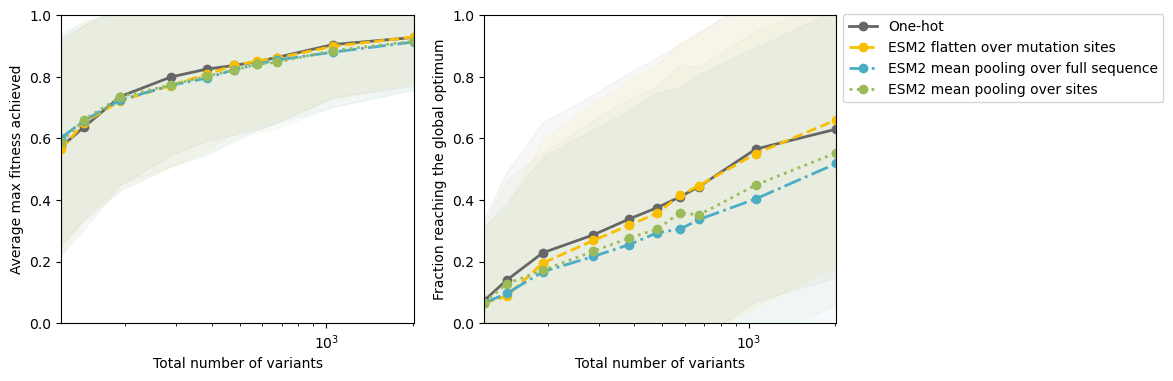

In [67]:

# for avg cross number of samples
n_top = 96
# n_corr = 384

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
mlde_color_list = ["gray", "yellow", "blue", "green"]

for ax, mlde_metric, de_metric, y_label in zip(
    axes,
    ["top_maxes", "if_truemaxs"],
    ["mean_all", "fraction_max"],
    ["Average max fitness achieved", "Fraction reaching the global optimum"],
):

    for i, (emb_opt, ls) in enumerate(encoding_style.items()):
        mlde_df = get_mlde_avg_sdf(
            mlde, n_top, n_mut_cutoff="all", zs="none", encoding_list=[emb_opt], active_lib_list=active_lib_list
        )

        ax.plot(
            TOTAL_N_LIST,
            mlde_df[f"{mlde_metric}_mean"],
            marker="o",
            linestyle=ls,
            linewidth=2,
            color=FZL_PALETTE[mlde_color_list[i]],
            label=encoding_des[emb_opt]
        )
        ax.fill_between(
            TOTAL_N_LIST,
            mlde_df[f"{mlde_metric}_mean"] - mlde_df[f"{mlde_metric}_std"],
            mlde_df[f"{mlde_metric}_mean"] + mlde_df[f"{mlde_metric}_std"],
            color=FZL_PALETTE[mlde_color_list[i]],
            alpha=0.05,
        )

    # # add vline
    # ax.axvline(
    #     n_corr,
    #     color="gray",
    #     linewidth=0.5,
    #     linestyle="dotted"
    # )
    ax.set_xlim(TOTAL_N_LIST[0], TOTAL_N_LIST[-1])
    ax.set_ylim(0, 1.0)

    ax.set_xscale("log")
    ax.set_xlabel("Total number of variants")
    ax.set_ylabel(y_label)


    if ax == axes[1]:
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1.025))
# fig.savefig("/disk2/fli/SSMuLA/sandbox/fig_svg/fig_s13.svg", dpi=300, bbox_inches="tight", format='svg')

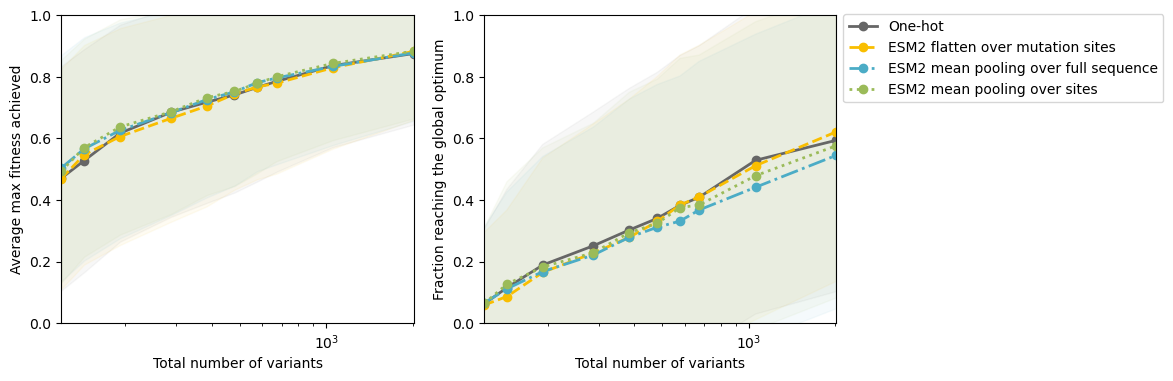

In [68]:

# for avg cross number of samples
n_top = 96
# n_corr = 384

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
mlde_color_list = ["gray", "yellow", "blue", "green"]

for ax, mlde_metric, de_metric, y_label in zip(
    axes,
    ["top_maxes", "if_truemaxs"],
    ["mean_all", "fraction_max"],
    ["Average max fitness achieved", "Fraction reaching the global optimum"],
):

    for i, (emb_opt, ls) in enumerate(encoding_style.items()):
        mlde_df = get_mlde_avg_sdf(
            mlde, n_top, n_mut_cutoff="all", zs="none", encoding_list=[emb_opt], active_lib_list=sorted(mlde["lib"].unique())
        )

        ax.plot(
            TOTAL_N_LIST,
            mlde_df[f"{mlde_metric}_mean"],
            marker="o",
            linestyle=ls,
            linewidth=2,
            color=FZL_PALETTE[mlde_color_list[i]],
            label=encoding_des[emb_opt]
        )
        ax.fill_between(
            TOTAL_N_LIST,
            mlde_df[f"{mlde_metric}_mean"] - mlde_df[f"{mlde_metric}_std"],
            mlde_df[f"{mlde_metric}_mean"] + mlde_df[f"{mlde_metric}_std"],
            color=FZL_PALETTE[mlde_color_list[i]],
            alpha=0.05,
        )

    # # add vline
    # ax.axvline(
    #     n_corr,
    #     color="gray",
    #     linewidth=0.5,
    #     linestyle="dotted"
    # )
    ax.set_xlim(TOTAL_N_LIST[0], TOTAL_N_LIST[-1])
    ax.set_ylim(0, 1.0)

    ax.set_xscale("log")
    ax.set_xlabel("Total number of variants")
    ax.set_ylabel(y_label)


    if ax == axes[1]:
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1.025))
# fig.savefig("/disk2/fli/SSMuLA/sandbox/fig_svg/fig_s13_all.svg", dpi=300, bbox_inches="tight", format='svg')

          top_maxes_mean  top_maxes_std  if_truemaxs_mean  if_truemaxs_std
n_sample                                                                  
24              0.161806       0.195434             0.030         0.171015
48              0.200229       0.229304             0.040         0.196451
96              0.261547       0.283129             0.070         0.255787
192             0.340129       0.333299             0.145         0.352984
288             0.394717       0.356874             0.195         0.397195
384             0.453203       0.373778             0.235         0.425063
480             0.515179       0.380543             0.300         0.459408
576             0.551649       0.370649             0.305         0.461563
960             0.631005       0.368735             0.420         0.494797
1920            0.718976       0.325380             0.485         0.501029
          top_maxes_mean  top_maxes_std  if_truemaxs_mean  if_truemaxs_std
n_sample                 

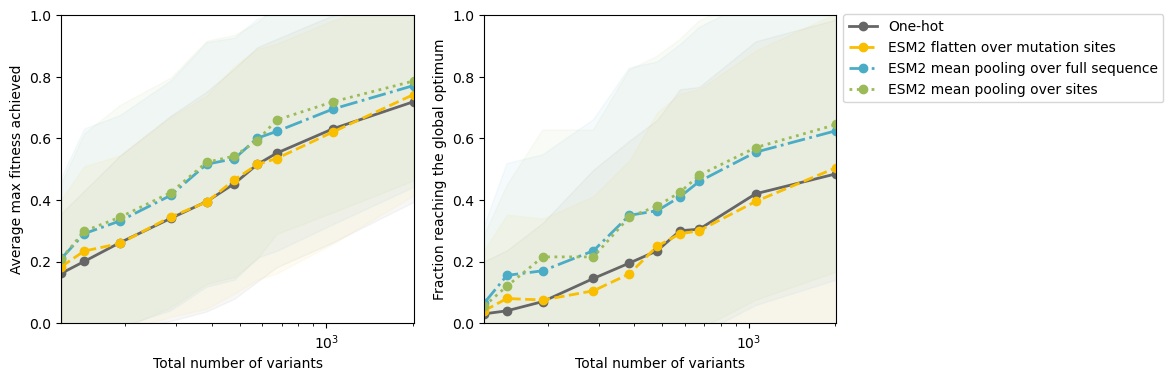

In [69]:

# for avg cross number of samples
n_top = 96
# n_corr = 384

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
mlde_color_list = ["gray", "yellow", "blue", "green"]

for ax, mlde_metric, de_metric, y_label in zip(
    axes,
    ["top_maxes", "if_truemaxs"],
    ["mean_all", "fraction_max"],
    ["Average max fitness achieved", "Fraction reaching the global optimum"],
):

    for i, (emb_opt, ls) in enumerate(encoding_style.items()):
        mlde_df = get_mlde_avg_sdf(
            mlde, n_top, n_mut_cutoff="all", zs="none", encoding_list=[emb_opt], active_lib_list=lib_stat[~(lib_stat["percent_active"]>=active_cutoff)]["lib"].tolist()
        )

        print(mlde_df)

        ax.plot(
            TOTAL_N_LIST,
            mlde_df[f"{mlde_metric}_mean"],
            marker="o",
            linestyle=ls,
            linewidth=2,
            color=FZL_PALETTE[mlde_color_list[i]],
            label=encoding_des[emb_opt]
        )
        ax.fill_between(
            TOTAL_N_LIST,
            mlde_df[f"{mlde_metric}_mean"] - mlde_df[f"{mlde_metric}_std"],
            mlde_df[f"{mlde_metric}_mean"] + mlde_df[f"{mlde_metric}_std"],
            color=FZL_PALETTE[mlde_color_list[i]],
            alpha=0.05,
        )

    # # add vline
    # ax.axvline(
    #     n_corr,
    #     color="gray",
    #     linewidth=0.5,
    #     linestyle="dotted"
    # )
    ax.set_xlim(TOTAL_N_LIST[0], TOTAL_N_LIST[-1])
    ax.set_ylim(0, 1.0)

    ax.set_xscale("log")
    ax.set_xlabel("Total number of variants")
    ax.set_ylabel(y_label)


    if ax == axes[1]:
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1.025))
# fig.savefig("/disk2/fli/SSMuLA/sandbox/fig_svg/fig_s13_inactive.svg", dpi=300, bbox_inches="tight", format='svg')

In [13]:
mlde_ev = pd.concat(
    [
        mlde_all[
            (mlde_all["n_mut_cutoff"] == "all")
            & (mlde_all["zs"] == "ev_score")
            & (mlde_all["n_top"] == 96)
            & (mlde_all["rep"].isin(np.arange(50)))
            & (mlde_all["model"] == "boosting")
        ],
        old_mlde_all[
            (old_mlde_all["n_mut_cutoff"] == "all")
            & (old_mlde_all["zs"] == "ev_score")
            & (old_mlde_all["n_top"] == 96)
            & (old_mlde_all["encoding"] != "one-hot")
            & (old_mlde_all["rep"].isin(np.arange(50)))
            & (old_mlde_all["model"] == "boosting")
        ],
        emd_mlde[
            (emd_mlde["zs"] == "ev_score")
            & (emd_mlde["n_top"] == 96)
            & (emd_mlde["n_mut_cutoff"] == "all")
            & (emd_mlde["rep"].isin(np.arange(50)))
            & (emd_mlde["model"] == "boosting")
        ],
    ]
)

In [36]:
ft_mlde_df_dict = {}

for zs in ZS_OPTS[1:]:
    ft_mlde_df_dict[zs] = pd.concat(
    [
        mlde_all[
            (mlde_all["n_mut_cutoff"] == "all")
            & (mlde_all["zs"] == zs)
            & (mlde_all["n_top"] == 96)
            & (mlde_all["rep"].isin(np.arange(50)))
            & (mlde_all["model"] == "boosting")
        ],
        old_mlde_all[
            (old_mlde_all["n_mut_cutoff"] == "all")
            & (old_mlde_all["zs"] == zs)
            & (old_mlde_all["n_top"] == 96)
            & (old_mlde_all["encoding"] != "one-hot")
            & (old_mlde_all["rep"].isin(np.arange(50)))
            & (old_mlde_all["model"] == "boosting")
        ],
        emd_mlde[
            (emd_mlde["zs"] == zs)
            & (emd_mlde["n_top"] == 96)
            & (emd_mlde["n_mut_cutoff"] == "all")
            & (emd_mlde["rep"].isin(np.arange(50)))
            & (emd_mlde["model"] == "boosting")
        ],
    ]
)

In [37]:
ft_mlde_df_dict["ed_score"] = pd.concat(
    [
        mlde_all[
            (mlde_all["n_mut_cutoff"] == "double")
            & (mlde_all["zs"] == "none")
            & (mlde_all["n_top"] == 96)
            & (mlde_all["rep"].isin(np.arange(50)))
            & (mlde_all["model"] == "boosting")
        ],
        old_mlde_all[
            (old_mlde_all["n_mut_cutoff"] == "double")
            & (old_mlde_all["zs"] == "none")
            & (old_mlde_all["n_top"] == 96)
            & (old_mlde_all["encoding"] != "one-hot")
            & (old_mlde_all["rep"].isin(np.arange(50)))
            & (old_mlde_all["model"] == "boosting")
        ],
        emd_mlde[
            (emd_mlde["zs"] == "none")
            & (emd_mlde["n_top"] == 96)
            & (emd_mlde["n_mut_cutoff"] == "all")
            & (emd_mlde["rep"].isin(np.arange(50)))
            & (emd_mlde["model"] == "boosting")
        ],
    ]
)

In [38]:
ft_mlde_df_dict.keys()

dict_keys(['ev_score', 'esm_score', 'esmif_score', 'coves_score', 'Triad_score', 'ed_score'])

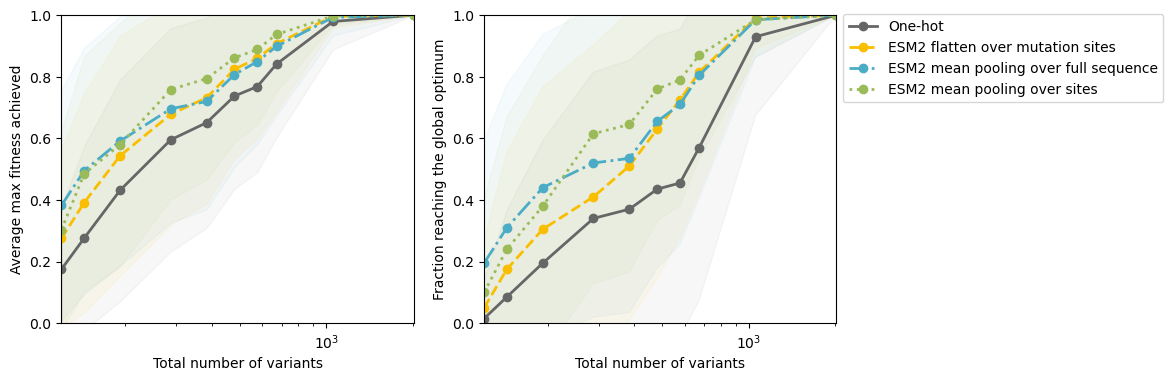

In [46]:

# for avg cross number of samples
n_top = 96
# n_corr = 384

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
mlde_color_list = ["gray", "yellow", "blue", "green"]

for ax, mlde_metric, de_metric, y_label in zip(
    axes,
    ["top_maxes", "if_truemaxs"],
    ["mean_all", "fraction_max"],
    ["Average max fitness achieved", "Fraction reaching the global optimum"],
):

    for i, (emb_opt, ls) in enumerate(encoding_style.items()):
        mlde_df = get_mlde_avg_sdf(
            mlde_ev, n_top, n_mut_cutoff="all", zs="ev_score", encoding_list=[emb_opt], active_lib_list=lib_stat[~(lib_stat["percent_active"]>=active_cutoff)]["lib"].tolist()
        )

        ax.plot(
            TOTAL_N_LIST,
            mlde_df[f"{mlde_metric}_mean"],
            marker="o",
            linestyle=ls,
            linewidth=2,
            color=FZL_PALETTE[mlde_color_list[i]],
            label=encoding_des[emb_opt]
        )
        ax.fill_between(
            TOTAL_N_LIST,
            mlde_df[f"{mlde_metric}_mean"] - mlde_df[f"{mlde_metric}_std"],
            mlde_df[f"{mlde_metric}_mean"] + mlde_df[f"{mlde_metric}_std"],
            color=FZL_PALETTE[mlde_color_list[i]],
            alpha=0.05,
        )

    # # add vline
    # ax.axvline(
    #     n_corr,
    #     color="gray",
    #     linewidth=0.5,
    #     linestyle="dotted"
    # )
    ax.set_xlim(TOTAL_N_LIST[0], TOTAL_N_LIST[-1])
    ax.set_ylim(0, 1.0)

    ax.set_xscale("log")
    ax.set_xlabel("Total number of variants")
    ax.set_ylabel(y_label)


    if ax == axes[1]:
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1.025))
fig.savefig("/disk2/fli/SSMuLA/sandbox/fig_svg/fig_s13_inactive_ev.svg", dpi=300, bbox_inches="tight", format='svg')

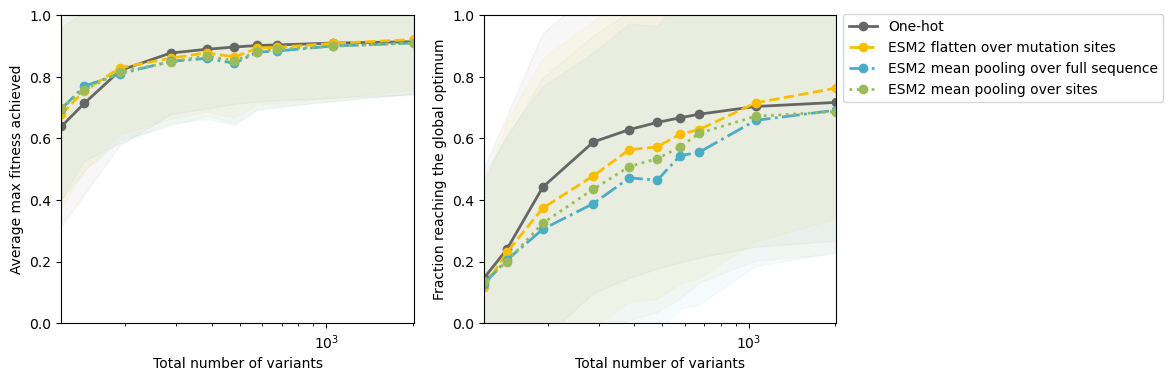

In [17]:
# for avg cross number of samples
n_top = 96
# n_corr = 384

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
mlde_color_list = ["gray", "yellow", "blue", "green"]

for ax, mlde_metric, de_metric, y_label in zip(
    axes,
    ["top_maxes", "if_truemaxs"],
    ["mean_all", "fraction_max"],
    ["Average max fitness achieved", "Fraction reaching the global optimum"],
):

    for i, (emb_opt, ls) in enumerate(encoding_style.items()):
        mlde_df = get_mlde_avg_sdf(
            mlde_ev,
            n_top,
            n_mut_cutoff="all",
            zs="ev_score",
            encoding_list=[emb_opt],
            active_lib_list=[
                "DHFR",
                "ParD2",
                "ParD3",
                "GB1",
                "T7",
                "TEV",
                "TrpB3D",
                "TrpB3E",
                "TrpB3F",
                "TrpB3G",
                "TrpB3I",
                "TrpB4",
            ],
        )

        ax.plot(
            TOTAL_N_LIST,
            mlde_df[f"{mlde_metric}_mean"],
            marker="o",
            linestyle=ls,
            linewidth=2,
            color=FZL_PALETTE[mlde_color_list[i]],
            label=encoding_des[emb_opt],
        )
        ax.fill_between(
            TOTAL_N_LIST,
            mlde_df[f"{mlde_metric}_mean"] - mlde_df[f"{mlde_metric}_std"],
            mlde_df[f"{mlde_metric}_mean"] + mlde_df[f"{mlde_metric}_std"],
            color=FZL_PALETTE[mlde_color_list[i]],
            alpha=0.05,
        )

    # # add vline
    # ax.axvline(
    #     n_corr,
    #     color="gray",
    #     linewidth=0.5,
    #     linestyle="dotted"
    # )
    ax.set_xlim(TOTAL_N_LIST[0], TOTAL_N_LIST[-1])
    ax.set_ylim(0, 1.0)

    ax.set_xscale("log")
    ax.set_xlabel("Total number of variants")
    ax.set_ylabel(y_label)

    if ax == axes[1]:
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1.025))
fig.savefig("/disk2/fli/SSMuLA/sandbox/fig_svg/fig_s13_ev.svg", dpi=300, bbox_inches="tight", format='svg')

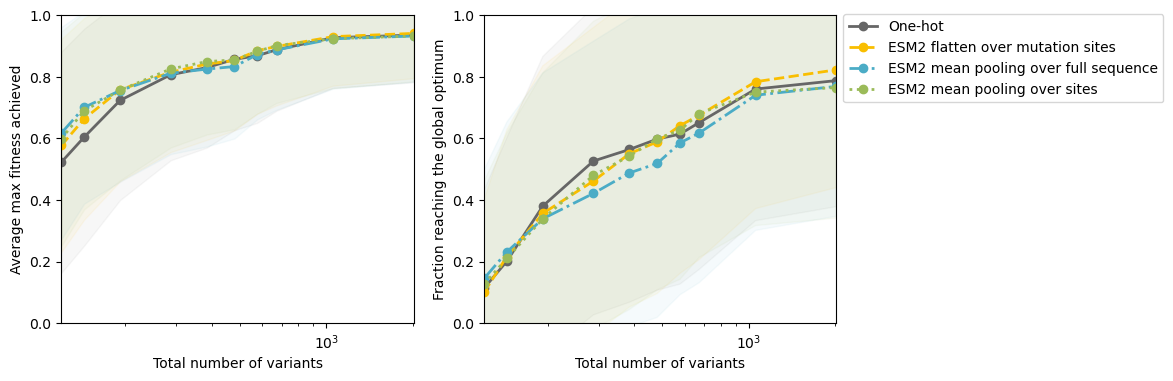

In [19]:

# for avg cross number of samples
n_top = 96
# n_corr = 384

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
mlde_color_list = ["gray", "yellow", "blue", "green"]

for ax, mlde_metric, de_metric, y_label in zip(
    axes,
    ["top_maxes", "if_truemaxs"],
    ["mean_all", "fraction_max"],
    ["Average max fitness achieved", "Fraction reaching the global optimum"],
):

    for i, (emb_opt, ls) in enumerate(encoding_style.items()):
        mlde_df = get_mlde_avg_sdf(
            mlde_ev, n_top, n_mut_cutoff="all", zs="ev_score", encoding_list=[emb_opt], active_lib_list=sorted(mlde_ev["lib"].unique().tolist())
        )

        ax.plot(
            TOTAL_N_LIST,
            mlde_df[f"{mlde_metric}_mean"],
            marker="o",
            linestyle=ls,
            linewidth=2,
            color=FZL_PALETTE[mlde_color_list[i]],
            label=encoding_des[emb_opt]
        )
        ax.fill_between(
            TOTAL_N_LIST,
            mlde_df[f"{mlde_metric}_mean"] - mlde_df[f"{mlde_metric}_std"],
            mlde_df[f"{mlde_metric}_mean"] + mlde_df[f"{mlde_metric}_std"],
            color=FZL_PALETTE[mlde_color_list[i]],
            alpha=0.05,
        )

    # # add vline
    # ax.axvline(
    #     n_corr,
    #     color="gray",
    #     linewidth=0.5,
    #     linestyle="dotted"
    # )
    ax.set_xlim(TOTAL_N_LIST[0], TOTAL_N_LIST[-1])
    ax.set_ylim(0, 1.0)

    ax.set_xscale("log")
    ax.set_xlabel("Total number of variants")
    ax.set_ylabel(y_label)


    if ax == axes[1]:
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1.025))
# fig.savefig("/disk2/fli/SSMuLA/sandbox/fig_svg/fig_s13_inactive.svg", dpi=300, bbox_inches="tight", format='svg')